500


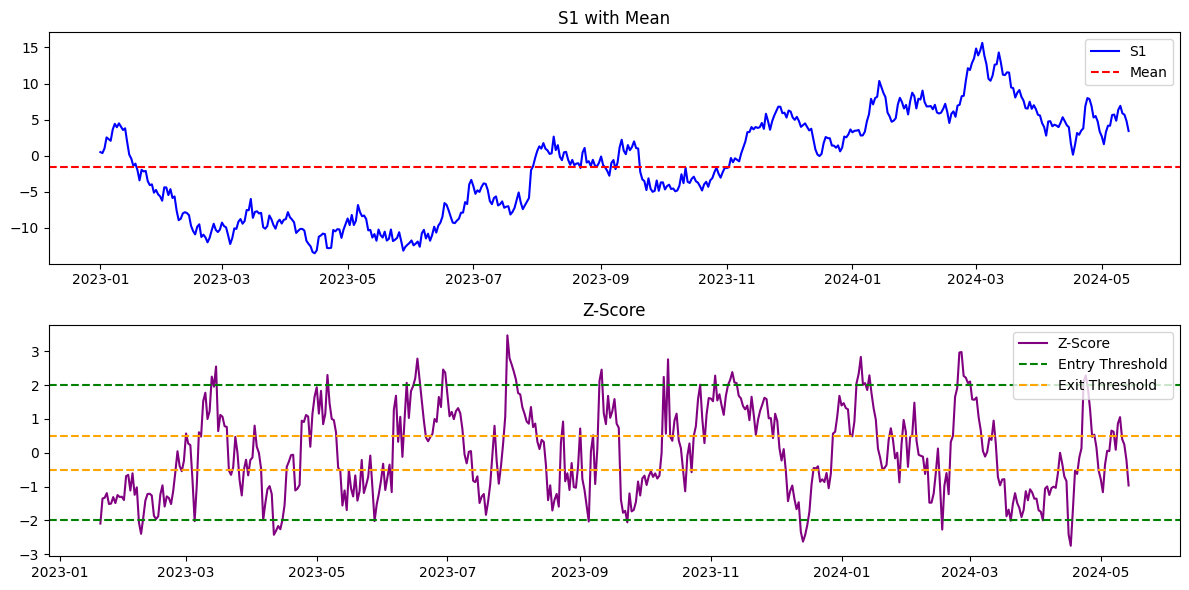

         Date    Position      Price
0  2023-02-07        Long  -7.614149
1  2023-02-25   Exit Long  -9.437660
2  2023-03-05        Long -12.246656
3  2023-03-07   Exit Long -10.077890
4  2023-03-13       Short  -7.530419
5  2023-03-21  Exit Short  -9.907212
6  2023-04-11        Long -11.800022
7  2023-04-17   Exit Long -11.236709
8  2023-05-06       Short  -6.840386
9  2023-05-11  Exit Short -10.351708
10 2023-05-28        Long -13.167956
11 2023-06-01   Exit Long -11.752089
12 2023-06-12       Short  -9.845283
13 2023-06-21  Exit Short  -9.275404
14 2023-06-29       Short  -3.985431
15 2023-07-09  Exit Short  -6.276036
16 2023-07-29       Short  -2.017662
17 2023-08-12  Exit Short  -0.154308
18 2023-09-05        Long  -2.776162
19 2023-09-06   Exit Long  -1.010708
20 2023-09-10       Short   1.173408
21 2023-09-20  Exit Short  -2.247759
22 2023-09-23        Long  -4.772498
23 2023-10-09   Exit Long  -4.161149
24 2023-10-10       Short  -2.575133
25 2023-10-13  Exit Short  -3.632003
2

In [2]:
#a z-score-based trading strategy using the co-integration factor simulation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# # Simulated example data (replace with your actual S1 data)
np.random.seed(42)
dates = pd.date_range(start="2023-01-01", periods=500, freq="D")
S1 = np.cumsum(np.random.normal(0, 1, len(dates)))  # Simulated mean-reverting S1

# Calculate rolling mean and standard deviation for S1
rolling_window = 20  # Define rolling window size
mean_S1 = pd.Series(S1).rolling(window=rolling_window).mean()
std_S1 = pd.Series(S1).rolling(window=rolling_window).std()

# Calculate z-score
z_score = (S1 - mean_S1) / std_S1
print(len(S1))

# Define thresholds for entry and exit
entry_threshold = 2.0
exit_threshold = 0.5

# Initialize variables
position = 0  # Current position: 1 for long, -1 for short, 0 for neutral
pnl = 0  # Total profit and loss
trade_log = []  # To store trade details

# Trading strategy simulation
for i in range(rolling_window, len(S1)):
    if position == 0:  # No position
        if z_score[i] > entry_threshold:  # Short entry
            position = -1
            entry_price = S1[i]
            trade_log.append({"Date": dates[i], "Position": "Short", "Price": entry_price})
        elif z_score[i] < -entry_threshold:  # Long entry
            position = 1
            entry_price = S1[i]
            trade_log.append({"Date": dates[i], "Position": "Long", "Price": entry_price})

    elif position == 1:  # Long position
        if z_score[i] > -exit_threshold:  # Exit long
            pnl += S1[i] - entry_price
            trade_log.append({"Date": dates[i], "Position": "Exit Long", "Price": S1[i]})
            position = 0

    elif position == -1:  # Short position
        if z_score[i] < exit_threshold:  # Exit short
            pnl += entry_price - S1[i]
            trade_log.append({"Date": dates[i], "Position": "Exit Short", "Price": S1[i]})
            position = 0

# Convert trade log to DataFrame for analysis
trade_log_df = pd.DataFrame(trade_log)

# Plot S1 and z-score
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(dates, S1, label="S1", color="blue")
plt.axhline(mean_S1.mean(), color="red", linestyle="--", label="Mean")
plt.title("S1 with Mean")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(dates, z_score, label="Z-Score", color="purple")
plt.axhline(entry_threshold, color="green", linestyle="--", label="Entry Threshold")
plt.axhline(-entry_threshold, color="green", linestyle="--")
plt.axhline(exit_threshold, color="orange", linestyle="--", label="Exit Threshold")
plt.axhline(-exit_threshold, color="orange", linestyle="--")
plt.title("Z-Score")
plt.legend()

plt.tight_layout()
plt.show()

# Print trade log and final PnL
print(trade_log_df)
print(f"Final PnL: {pnl}\n")
